In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import utils as u
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import result_gen_utils as ru

from matplotlib import rc
rc('text', usetex=False)


# results

In [3]:

def read_sampled_results(in_df_name):
    
    in_df = pd.read_pickle(in_df_name)
    in_df = in_df.reset_index()
    #in_df = in_df.sample(n=1000, replace=False, random_state=0).copy()
    
    return in_df

In [4]:
result_dfs = {}

result_dfs['ldr_real_100'] = read_sampled_results('result_csv/ldr_real_100_halfRepo.csv')
result_dfs['ldr_fake_100'] = read_sampled_results('result_csv/ldr_fake_100_halfRepo.csv')
result_dfs['FF_real_100'] = read_sampled_results('result_csv/FF_real_100_halfRepo.csv')
result_dfs['FF_fake_100'] = read_sampled_results('result_csv/FF_fake_100_halfRepo.csv')
result_dfs['GG_real_100'] = read_sampled_results('result_csv/GG_real_100_halfRepo.csv')
result_dfs['GG_fake_100'] = read_sampled_results('result_csv/GG_fake_100_halfRepo.csv')
result_dfs['DFDC_real_100'] = read_sampled_results('result_csv/DFDC_real_100_halfRepo.csv')
result_dfs['DFDC_fake_100'] = read_sampled_results('result_csv/DFDC_fake_100_halfRepo.csv')
result_dfs['CDF_real_100'] = read_sampled_results('result_csv/CDF_real_100_halfRepo.csv')
result_dfs['CDF_fake_100'] = read_sampled_results('result_csv/CDF_fake_100_halfRepo.csv')


In [5]:
# assign behavior ids 
for k in result_dfs.keys():
    
    result_dfs[k]['actualLabel_behav'] = ru.get_behav_id(result_dfs[k])

## compute individual distance from face and behav id or agnostic

In [6]:

# get idividual distances
for k in result_dfs.keys():
    
    result_dfs[k]['vgg_behav_id_sim'] = ru.get_vgg_behav_id(result_dfs[k])
    result_dfs[k]['vgg_face_id_sim'] = ru.get_vgg_face_id(result_dfs[k])
    result_dfs[k]['fab_face_id_sim'] = ru.get_fab_face_id(result_dfs[k])
    result_dfs[k]['fab_behav_id_sim'] = ru.get_fab_behav_id(result_dfs[k])
    result_dfs[k]['only_fab'] = ru.get_max_fab(result_dfs[k])
    result_dfs[k]['only_vgg'] = ru.get_max_vgg(result_dfs[k])


## plot individual distance 

In [7]:
def save_data(in_feat_nm):
    data = {}
    
    # plot
    data['real'] = np.concatenate([np.array(result_dfs[k][in_feat_nm]) for k in ['ldr_real_100', 
                                                          'FF_real_100', 
                                                          'GG_real_100', 
                                                          'DFDC_real_100',
                                                          'CDF_real_100']], axis=0)
    m = ['ldr_fake_100', 
         'FF_fake_100',  
         'GG_fake_100',  
         'DFDC_fake_100', 
         'CDF_fake_100']
    legs = ['LDR', 'FF', 'DFD', 'DFDC', 'CDF']
    for f in range(len(m)):
        data[legs[f]] = np.array(result_dfs[m[f]][in_feat_nm])
    u.save_obj(data, 'ECCV20_figures', f'{in_feat_nm}')

save_data('vgg_face_id_sim')
save_data('vgg_behav_id_sim')
save_data('fab_face_id_sim')
save_data('fab_behav_id_sim')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


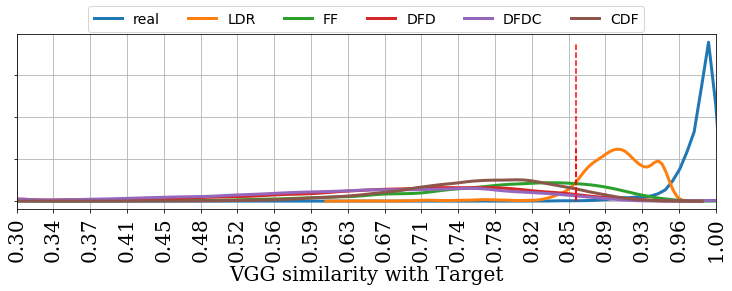

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


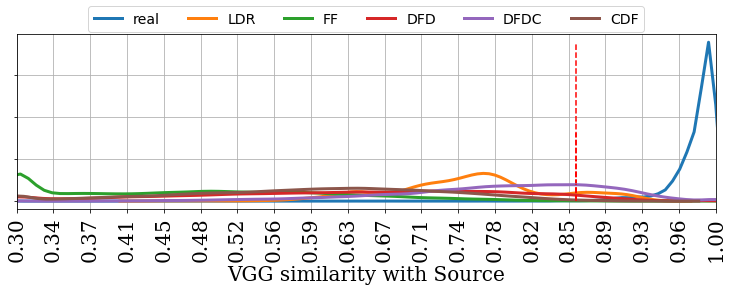

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


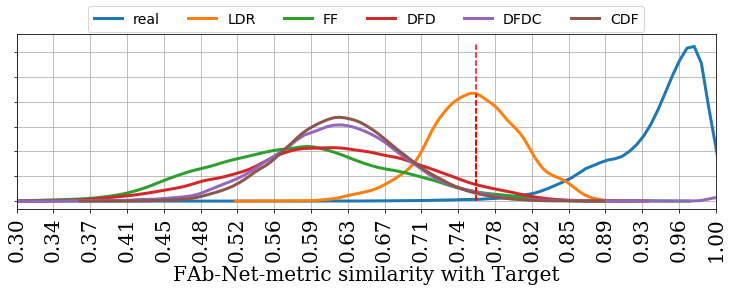

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


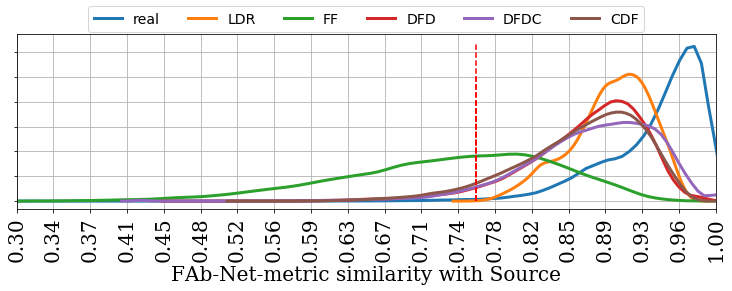

In [9]:

def plot_one_curve(X, in_leg, ax, thres, bins):
    
    # plot the distrutions with bins
    X[X<bins[0]] = bins[0]

    # distplot
    sns.distplot(X, bins=bins, hist=False, kde=True, 
                 norm_hist=True, label=in_leg, ax=ax, kde_kws={'lw': 3})
    
    # write the name of the datset on top of the mode
    n, _ = np.histogram(X, bins=bins, density=True)    
    ax.plot([thres, thres], [0, np.max(n)], 'r--')
    

def plot_one_row(data_fldr, in_feat_nm, xlbl, thres):
    
    data = {}
    
    # params
    bins = np.linspace(0.3, 1, 50)
    fontdict={'family': 'serif', 'weight': 'normal', 'size': 20}
    
    _, ax = plt.subplots(figsize=(10, 4))
    data = u.load_obj(data_fldr, in_feat_nm)

    # plot
    for k in data.keys():
        plot_one_curve(data[k], k, ax, thres, bins)
    
    ax.grid(b=True)
    
    # xticks
    ax.set_xlim([bins[0], bins[-1]])
    xtcks = np.linspace(bins[0], bins[-1], 20)
    ax.set_xticks(xtcks)
    ax.set_xticklabels([f'{x:.2f}' for x in xtcks], rotation=90, fontdict=fontdict)
    ax.set_xlabel(xlbl, fontdict=fontdict)
    
    # yticks
    ax.set_yticklabels('', fontdict=fontdict)
    
    legend = ax.legend(loc='upper center', 
                       bbox_to_anchor=(0.5, 1.2), ncol=6, 
                       fancybox=True, shadow=False, fontsize=14)
    plt.tight_layout(pad=0.1, h_pad=None, w_pad=None, rect=None)
    plt.savefig(f'ECCV20_figures/{in_feat_nm}.eps')
    plt.show()

plot_one_row('ECCV20_figures', 'vgg_face_id_sim', 'VGG similarity with Target', thres=0.86)
plot_one_row('ECCV20_figures', 'vgg_behav_id_sim', 'VGG similarity with Source', thres=0.86)
plot_one_row('ECCV20_figures', 'fab_face_id_sim', 'FAb-Net-metric similarity with Target', thres=0.76)
plot_one_row('ECCV20_figures', 'fab_behav_id_sim', 'FAb-Net-metric similarity with Source', thres=0.76)



In [81]:
# legend failed code

    fig_legend, ax_legend = plt.subplots(figsize=(10, 3))
    # legend
    handles,labels = ax.get_legend_handles_labels()
    fig_legend.legend(handles, labels, loc='upper center', 
                       bbox_to_anchor=(0.5, 1.5), ncol=6, 
                       fancybox=True, shadow=False, fontsize=14)
    fig_legend.patch.set_visible(False)
    ax_legend.axis('off')
    ax_legend.xaxis.set_visible(False)
    ax_legend.yaxis.set_visible(False)
    fig_legend.tight_layout(pad=0., h_pad=None, w_pad=None, rect=None)
    fig_legend.savefig(f'ECCV20_figures/{in_feat_nm}_legend.png')
    fig_legend.show()
    



NameError: name 'ax' is not defined